<a href="https://colab.research.google.com/github/ShayanSadeghpour/Covid19_Analysis/blob/main/GA_Prediction_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [58]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [59]:
df = pd.read_csv('gdrive/My Drive/MetricShop.csv', index_col='date', parse_dates=True)
##(path, index_col='date', parse_dates=True)
df.index.freq='MS'

df.head() , df.tail(10)

(               GA
 date             
 2019-01-01  27635
 2019-02-01  23516
 2019-03-01  29212
 2019-04-01  21389
 2019-05-01  26774,                GA
 date             
 2021-12-01  67375
 2022-01-01  42724
 2022-02-01  37469
 2022-03-01  42093
 2022-04-01  34631
 2022-05-01  35946
 2022-06-01  41883
 2022-07-01  34070
 2022-08-01  36221
 2022-09-01  24990)

In [60]:
df.describe()

,GA
count,45.000000
mean,42454.688889
std,12429.351698
min,21389.000000
25%,35711.000000
50%,41819.000000
75%,48636.000000
max,72987.000000


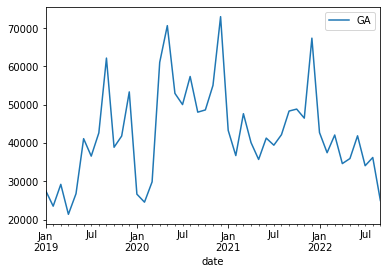

In [61]:
df.plot()

In [62]:
from statsmodels.tsa.stattools import adfuller

In [63]:
test_result=adfuller(df['GA'])

In [64]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(GA):
    result=adfuller(GA)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [65]:
adfuller_test(df['GA'])

ADF Test Statistic : -3.7517630647077365
p-value : 0.003441247639732874
#Lags Used : 0
Number of Observations Used : 44
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [71]:
df['Sales First Difference'] = df['GA'] - df['GA'].shift(1)

In [72]:
df['GA'].shift(1)

date
2019-01-01        NaN
2019-02-01    27635.0
2019-03-01    23516.0
2019-04-01    29212.0
2019-05-01    21389.0
2019-06-01    26774.0
2019-07-01    41138.0
2019-08-01    36579.0
2019-09-01    42648.0
2019-10-01    62171.0
2019-11-01    38891.0
2019-12-01    41819.0
2020-01-01    53342.0
2020-02-01    26654.0
2020-03-01    24561.0
2020-04-01    29867.0
2020-05-01    61057.0
2020-06-01    70639.0
2020-07-01    52957.0
2020-08-01    50033.0
2020-09-01    57366.0
2020-10-01    48055.0
2020-11-01    48636.0
2020-12-01    55048.0
2021-01-01    72987.0
2021-02-01    43309.0
2021-03-01    36720.0
2021-04-01    47655.0
2021-05-01    40112.0
2021-06-01    35711.0
2021-07-01    41284.0
2021-08-01    39431.0
2021-09-01    42168.0
2021-10-01    48345.0
2021-11-01    48856.0
2021-12-01    46494.0
2022-01-01    67375.0
2022-02-01    42724.0
2022-03-01    37469.0
2022-04-01    42093.0
2022-05-01    34631.0
2022-06-01    35946.0
2022-07-01    41883.0
2022-08-01    34070.0
2022-09-01    36221.0
Freq:

In [73]:
df['Seasonal First Difference']=df['GA']-df['GA'].shift(12)

In [69]:
df.head(14)

,GA,Sales First Difference,Seasonal First Difference
date,,,
2019-01-01,27635,NaN,NaN
2019-02-01,23516,-4119.0,NaN
2019-03-01,29212,5696.0,NaN
2019-04-01,21389,-7823.0,NaN
2019-05-01,26774,5385.0,NaN
2019-06-01,41138,14364.0,NaN
2019-07-01,36579,-4559.0,NaN
2019-08-01,42648,6069.0,NaN
2019-09-01,62171,19523.0,NaN


In [70]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.634453959579633
p-value : 0.08608333529614542
#Lags Used : 0
Number of Observations Used : 32
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [55]:
df['Seasonal First Difference'].plot()

KeyError: ignored

In [37]:
!pip install pandas.tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pandas.tools (from versions: none)
ERROR: No matching distribution found for pandas.tools


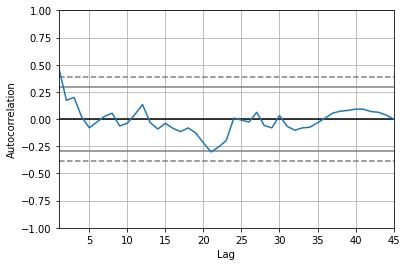

In [39]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['GA'])
plt.show()

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [74]:
df['Seasonal First Difference'].iloc[13:]

date
2020-02-01     1045.0
2020-03-01      655.0
2020-04-01    39668.0
2020-05-01    43865.0
2020-06-01    11819.0
2020-07-01    13454.0
2020-08-01    14718.0
2020-09-01   -14116.0
2020-10-01     9745.0
2020-11-01    13229.0
2020-12-01    19645.0
2021-01-01    16655.0
2021-02-01    12159.0
2021-03-01    17788.0
2021-04-01   -20945.0
2021-05-01   -34928.0
2021-06-01   -11673.0
2021-07-01   -10602.0
2021-08-01   -15198.0
2021-09-01      290.0
2021-10-01      220.0
2021-11-01    -8554.0
2021-12-01    -5612.0
2022-01-01     -585.0
2022-02-01      749.0
2022-03-01    -5562.0
2022-04-01    -5481.0
2022-05-01      235.0
2022-06-01      599.0
2022-07-01    -5361.0
2022-08-01    -5947.0
2022-09-01   -23355.0
Freq: MS, Name: Seasonal First Difference, dtype: float64

In [75]:
import statsmodels.api as sm 

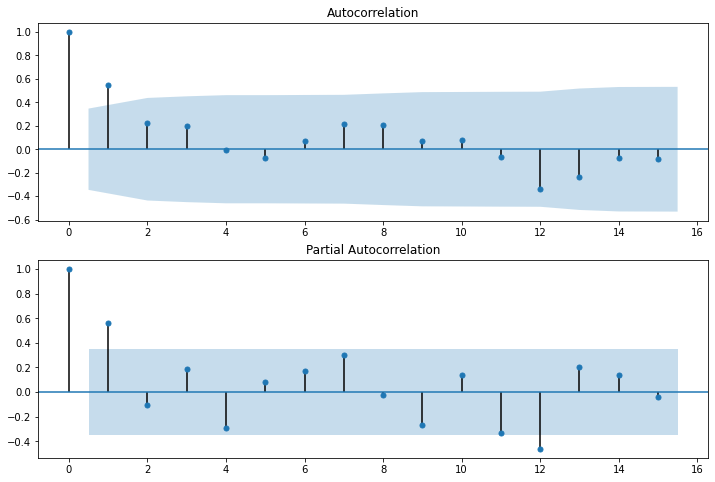

In [76]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=15,ax=ax2)

In [77]:
from statsmodels.tsa.arima_model import ARIMA

In [80]:
model=ARIMA(df['GA'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [81]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.GA   No. Observations:                   44
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -472.472
Method:                       css-mle   S.D. of innovations          11066.843
Date:                Wed, 21 Sep 2022   AIC                            952.944
Time:                        21:36:26   BIC                            960.080
Sample:                    02-01-2019   HQIC                           955.590
                         - 09-01-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.9258    463.485      0.220      0.826    -806.488    1010.340
ar.L1.D.GA     0.4073      0.229      1.776      0.076      -0.042       0.857
ma.L1.D.GA    -0.8566      0.164     -5.218      0.000      -1.178      -0.535
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.4553           +0.0000j            2.4553            0.0000
MA.1            1.1674           +0.0000j            1.1674            0.0000
-----------------------------------------------------------------------------
"""

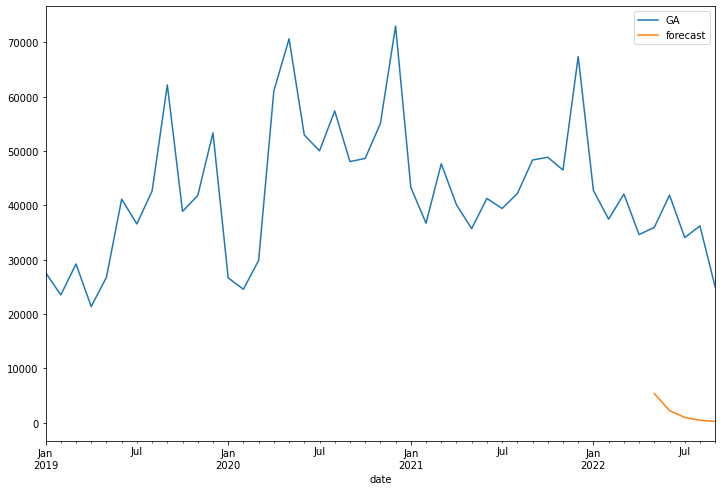

In [83]:
df['forecast']=model_fit.predict(start=40,end=45,dynamic=True)
df[['GA','forecast']].plot(figsize=(12,8))

In [84]:
import statsmodels.api as sm

In [85]:
model=sm.tsa.statespace.SARIMAX(df['GA'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


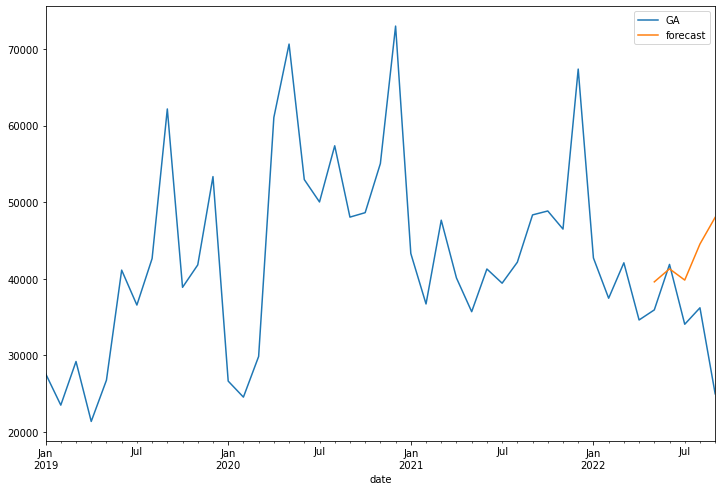

In [86]:
df['forecast']=results.predict(start=40,end=45,dynamic=True)
df[['GA','forecast']].plot(figsize=(12,8))

In [87]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [88]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [89]:
future_datest_df.tail()


,GA,Sales First Difference,Seasonal First Difference,forecast
2024-04-01,NaN,NaN,NaN,NaN
2024-05-01,NaN,NaN,NaN,NaN
2024-06-01,NaN,NaN,NaN,NaN
2024-07-01,NaN,NaN,NaN,NaN
2024-08-01,NaN,NaN,NaN,NaN


In [90]:
future_df=pd.concat([df,future_datest_df])

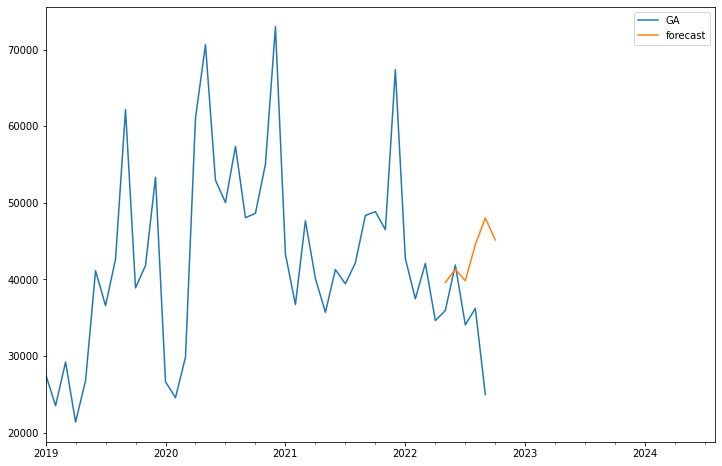

In [91]:
future_df['forecast'] = results.predict(start = 40, end = 45, dynamic= True)  
future_df[['GA', 'forecast']].plot(figsize=(12, 8)) 